# Amphi 5 - Unsupervised Learning [1] - K-Means and Hierarchical Clustering 

# 1. Introduction to Machine Learning

## 1.1 Some Applications of Machine Learning

These are some applications of machine learning, mentioned in the courses [1] and [2]:

- Email spam classification system
- Photo recognition
- Voice recognition
- Automatical translation
- Robots
- Recommendation system on Amazon, Netflix
- Bioinformatics
- Space exploration
- etc.

## 1.2 A Definition

**Definition of Arthur Samuel (1959)**

*Machine Learning is the field of study the gives computers the ability to learn without being explicitly programmed*

**Definition by Tom Mitchell (1998)**

*A computer program is said to learn from experience $E$ with respect to some task $T$ and some performance measure $P$ if its performance on $T$, as measured by P, improves with experience $E$.*

**Example:**

**Digit recognition**

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F1.png"></img>

- Task $T$: Classification of images into 10 categories associated with the digits 0, 1, ..., 9

- Measure $P$: Number of correct classifications (or some other measure)

- Experience $E$: Use some set of images that have been already classified and discover patterns from them

## 1.3 Why Machine Learning is the Future?

**Simple explanation by course [2]**

- Data amount become very huge: Until 2005, data on the world are estimated to be 130 EB of data ($\approx 1.3 \times 10^{20} $ bytes. ). Until 2010, 1200 EB. 2015: 7900 EB, 2020: 40900 EB etc.

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F2.png" width=600></img>

- The number of data scientists are not growing as fast as data. The number of machines are not, either.

- So if we want to handle efficiently large amounts of data, the remaining role belongs to machine learning.

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F4.png" width=600></img>

## 1.4 Main Machine Learning Problems

### 1.4.1 Supervised vs Unsupervised Learning

Their are two main classes of machine learning problems: **supervised learning** and **unsupervised learning**. 

**Supervised learning** is the machine learning task of learning a function that maps an input to an output based on example input-output pairs (labeled example). E.g.:

- Prediction of house price: We know that for any house, the expected outcome should be a reasonable positive number. We also have a set of real houses and their price in the market. These data can be used for training, so the machine will be able to predict new cases in the future.

- Classification of spam/non-spam emails: We know that the expected outcome should be a label: spam/non-spam. We already have a set of emails that were correctly classified.

Supervised learning problems, in its turn, can be classified into two main subclasses: **Regression** (when the outcome is a continuous variable) and **Classification** (when the outcome is a discrete variable).

**Unsupervised machine learning** is the machine learning task of inferring a function to describe hidden structure from "unlabeled" data. Since the examples given to the learner are unlabeled, there is no evaluation of the accuracy of the structure that is output by the relevant algorithm.

- Clustering: We have data corresponding to genes of lots of species, and would like to cluster them into groups. Data are not labeled, so we cannot explicitly evaluate the accuracy of our algorithm.

In other words, in those problems, for some new data $X$, we would like to predict the outcome $y$ via a function $f$ such that $f(X) \approx y$. In supervised learning, we have example data under the form $(X, y)$, while in unsupervised learning, we just have $(X)$.

### 1.4.2 Some other Problem Classes

- **Semi-supervised learning**: Example data are provided under both of the forms: $(X, y)$ and $(X)$.

- **Reinforcement learning**: Which actions should be take to maximize some notion of cumulative reward (Example: game, stock market...)

- **Recommendation systems**: predict the "rating" or "preference" a user would give to an item

- etc.






## 1.5 Model Representation

To solve a machine learning problems, the general procedure is like this

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F5.png" width=600></img>
<center>(Figure from course [1])</center>

In the figure:

- **Training set** is the example data. They can be under the form $(X, y)$ or $(X)$.
- **learning algorithm** or **learning model**
- **h**: After learning, the machine have built a **hypothesis**, or a **predictive model** to predict the outcome $y$ from a new data $x$.
- We often call **y** the **output/target/outcome**; we call **x** the **data/input/vector**. Coordinates of **x** are called **features**.

We discuss about **learning algorithm**. Usually, it can be described as an optimization problem. So it contains a cost function together with its the parameters. We need to find the best values of parameters that optimize the cost functions. So, we need an algorithm to solve this optimization problem. Please distinguish the two notions **learning algorithm** and **optimization algorithm**. 

**Example of learning algorithms**: Linear Regression, Logistic Regression, Naive Bayes Classification, etc.

**Example of optimization algorithms**: Gradient Descent, Newton Methods, etc.

# 2. Clustering

Considering the example: provided data corresponding to genes of lots of species. We would like to cluster them into groups.

We do not know have a clear what are we looking for: should the genes of similar species are grouped into a group? Which species are considered similar? As data are not labeled, so we cannot explicitly evaluate the accuracy of what we do.

So such a task is aim to **discover** some patterns, structures that can be use for further studying.

Clustering is an **unsupervised learning** subclass that aims to divide data into smaller groups based on some predefined criterion, for example, based on similarity.

**Formal Expression**

Let $\mathbf X_1, \ldots, \mathbf X_N$ be $N$ points in an Euclidean space $\mathbf R^d$. Let  $K$ be a positive integer. We want cluster those points into $K$ groups.

Let $d: \mathbf R^N \times \mathbf R^N : \mathbf R^+$ be a function of any pair of points, that we considered as a distance of them. 

To cluster those points, we want to find a function

$$
f : \{\mathbf X_1 , \ldots, \mathbf X_N\} \to \{0, 1, \ldots, k-1 \}
$$

minimizing the cost function (or the potential function/potential/inertia):

$$
\sum_{k=0}^{K-1} g(k, f)\sum_{f(\mathbf X_i)=k, f(\mathbf X_j)=k, i > j} d(\mathbf X_i, \mathbf X_j)
$$

where $g(k, f)$ is a function depends on the group $k$ and the choice of $f$. 

This can be considered as a general optimization problem of clustering a set into $K$ groups using some notion of distance as similarity.

# 3. K-Means Clustering

## 3.1 The Optimization Problem

In the formal expression in part 2, if we choose:

$$
d(\mathbf X_i, \mathbf X_j) = \Vert \mathbf X_i - \mathbf X_j \Vert^2
$$

(the square Euclidean distance)

and

$$
g(k, f) = |G_k(f)|^{-1} = \frac{1}{|\{i: f(X_i) = k\}|}
$$

(the number of points in cluster $k$, here $G_k(f)$ denote the cluster $k$)

then we have the following cost function:

$$
\sum_{k=0}^{K-1} \frac{1}{|G_k(f)|} \sum_{X_i, X_j \in G_k(f), i>j}  \Vert \mathbf X_i - \mathbf X_j \Vert^2
$$

Let $C_0(f), C_1(f), \ldots, C_{k-1}(f)$ denote the center of each cluster $G_0(f), G_1(f), \ldots, G_{k-1}(f)$, we can see that the optimization problem is equivalent to finding $f$ that minimizes:

$$
\sum_{k=0}^{K-1} \sum_{X_i \in G_k(f)}  \Vert \mathbf X_i - C_k(f) \Vert^2 \qquad \qquad \qquad (1)
$$

The learning algorithm solving the optimization problem above is called **K-Means**. Its name comes directly from the expression: group those points into $K$ clusters such that the sum of square distance of each point to its cluster's center is smallest. Each element of the sum is also known as the **within-cluster sum of squares** (WCSS) or simply the **with-in cluster variance**.

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F6.png" width=400></img>

## 3.2 Lloyd's algorithm

Mathematical results show that finding the optimal solution to the $K-Means$ clustering problem in $d$ dimension is

- NP-hard in general Euclidean space $d$ for 2 clusters.
- NP-hard for a general number of clusters $K$ for $d = 2$.
- If $K, d$ are fixed, the problem can be solved in $O(N^{Kd+1})$

So we should find an approximated algorithm rather than finding an exact solution. Lloyd's algorithm is the simplest one.

**Lloyd's algorithm (or K-Means algorithm)**
1. Arbitrarily choose $K$ initial centers $\mathcal C = \{C_0, . . . , C_{K-1}\}.$
2. For each $k \in \{1, . . . , K-1\}$, set the cluster $C_k$ to be the set of points that are closer to $C_k$ than they are to $C_j$ for all $j \neq k$.
3. For each $k \in \{1, . . . , K-1\}$, set $C_k$ to be the center of mass of all points in cluster $G_k$: $C_k = \frac1{|G_k|}\sum_{x\in G_k} x$
4. Repeat Steps 2 and 3 until $\mathcal C$ no longer changes.

**Notes**

- Lloyd's algorithm will stop after a finite number of iterations (the cost function decreases or remains after each step 2 and 3, its value belongs to a finite set)

- Lloyd's algorithm offers no accuracy guarantees. Let $\Phi$ denote the cost function at the convergence of the algorithm and let $\Phi_{opt}$ denote the optimal cost function. Then $\frac{\Phi}{\Phi_{opt}}$ is unbounded even when $N$ and $K$ are fixed.

- The running time of Lloyd's algorithm is $O(NKdi)$ where $i$ demote the number of iterations needed until convergence. On data that does have a clustering structure, the number of iterations until convergence is usually small. Lloyd's algorithm is hence considered to be "linear" complexity.

- In the worst-case, Lloyd's algorithm needs ${\displaystyle i=2^{\Omega ({\sqrt {n}})}}$ iterations.



**Illustration** (from course [2])

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F7.png" width=1000></img>

## 3.3 K-Means++

As mentioned in 3.2, Lloyd's algorithm offers no accuracy guarantees. In fact, if we initialize the $K$ centers randomly, there may be some bad choices that impact the algorithm.

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F8.png" width=600></img>

**K-Means++** is an initialization methods that help us guarantee a more stable result:

**K-Means++**

At any given time, $let D(x)$ denote the shortest distance from a data point x to the closest center we have already chosen. Then, we choose the centers like this:

1a. Choose an initial center $C_1$ uniformly at random from the whole set $\mathcal X$.

1b. Choose the next center $C_i$, selecting $C_i = x' \in \mathcal X$ with probability $\frac{D(x')^2}{\sum_{x \in \mathcal X} D(x)^2}$.

1c. Repeat Step 1b until we have chosen a total of $K$ centers.

2-4. Proceed as with the standard K-Means algorithm.

**K-Means++** is guaranteed by the following theorem:

Let $\Phi$ denote the cost function at the convergence of K-Means++ algorithm and let $\Phi_{opt}$ denote the optimal cost function. Then over any data set, 
$$
E[\Phi] \leq 8(\ln K + 2)\Phi_{opt}.
$$

## 3.4 Choose Optimal K

The cost function/inertia can gives us information about which $K$ should be a possible choice.

Suppose the cost function decreases like this:

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F11.png" width=600></img>

We can choose $K=3$, as that means for each cluster, the average distance of any point to the center is considerably reduced in comparison with the case $K=2$, whereas if we choose $K=4$ there are not as much as gain. This is the idea of **Elbow method** choose $K$ with the greatest gain of inertia.

This is just a theoretical suggestion. In practice, sometimes we need to use knowledge on the domain as well as intuition to choose $K$. 

## 3.5 K-Means with scikit-learn

KMeans class in scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In this section we use data downloaded from [6] and used in course [2], stored in the `Mall_Customers.csv` file. This contains data about customers of a big mall. Each line corresponds to a customer together with the genre, age, annual income and a spending score (in function of how much money they have spent in the mall). We will cluster those data into groups to explore what are the different segments of customers the mall has. We will only use annual income and spending score for illustration.

**Understanding data**

In [4]:
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


**Feature extraction**

In [7]:
X = data.iloc[:, 3:5]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Try with some $K$**

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model.fit(X)
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

**Try more $K$**

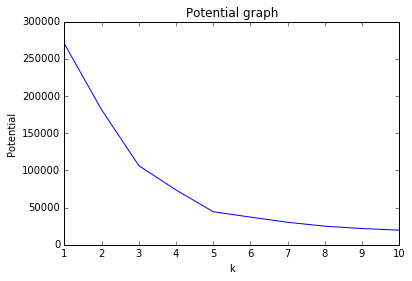

In [10]:
import matplotlib.pyplot as plt

potential = []
for i  in range(1, 11):
    model = KMeans(n_clusters = i)
    model.fit(X)
    potential.append(model.inertia_)
plt.plot(range(1, 11), potential)
plt.title("Potential graph")
plt.xlabel("k")
plt.ylabel("Potential")
plt.show()

**Now we prefer a 5-cluster solutions**

In [12]:
model = KMeans(n_clusters = 5)
y = model.fit_predict(X)
y

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

**Visualization**

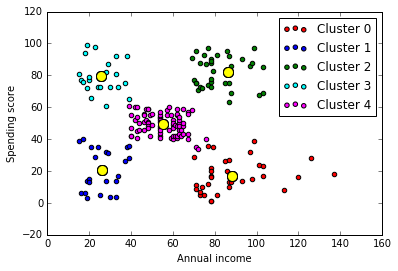

In [24]:
COLORS = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X.values[y == i, 0], X.values[y == i, 1], c = COLORS[i], label = 'Cluster %d' % i)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c = 'yellow')

plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()

We can know see that there are 5 segments of customers of the mall. They can be described as "careful", "careless", "sensible", "target", "standard". (This is, however, a fake and not realistic example.)

## 3.6 Metrics for K-Means

At the beginning of the section, we have used 

$$
d(\mathbf X_i, \mathbf X_j) = \Vert \mathbf X_i - \mathbf X_j \Vert^2
$$

(the square Euclidean distance)

as the metric to measure dissimilarity between two points. That leads to the fact that the point minimizing the WCSS (within-cluster sum of squares) is the centroid of the cluster.

If we try other metrics like:

- **L1**: $d(\mathbf X_i, \mathbf X_j) = \Vert \mathbf X_i - \mathbf X_j \Vert_1$
- **Cosine**: $d(\mathbf X_i, \mathbf X_j) = 1 - \cos(\mathbf X_i, \mathbf X_j)$ (Note that it is not a distance in metric-space sense)

Then by the same way, we also have new versions of $K-Means$, in which the centroid would be replaced by another special point in the cluster.

# 4. Agglomerative Hierarchical Clustering

## 4.1 Intuition

Like K-Means, Hierarchical Clustering (HC) are based on the idea that two close points should belong two one cluster. We process by beginning with $N$ clusters, then repeatedly group them until we arrive at $K$ clusters.

Step 1: Make each data point a single-point cluster. In this step we have $N$ cluster.

Step 2: Take the two closest data points and make them one cluster. So we have $N-1$ cluster.

Repeat: Take the two closest clusters and make them one cluster. 

Until: Remaining $K$ clusters.

**Illustration**

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F12.png" width=400></img>

**Some question**

- What kind of distance can we use here? -> notion of **metrics** (like K-Means)

- What are closest clusters? Or how to measure distance between clusters? -> notion of **linkage**.

## 4.2 Metrics

Unlike **K-Means**, we do not have to calculate a centroid or some point that minimize any sum of distance within a cluster, so it is free to choose any distance type we want. For example:

- Euclidean distance ($L2$): $\|a-b\|_{2}={\sqrt  {\sum _{i}(a_{i}-b_{i})^{2}}}$

- Manhattan distance ($L1$): $\|a-b\|_{1}=\sum _{i}|a_{i}-b_{i}|$

- Maximum distance ($L_\infty$): $\|a-b\|_{\infty }=\max _{i}|a_{i}-b_{i}|$

- Mahalanobis distance: ${\sqrt  {(a-b)^{{\top }}S^{{-1}}(a-b)}}$ where S is the Covariance matrix

- Cosine distance: $L_{\cos}(a, b) = 1 - \cos(a, b)$

## 4.3 Linkage

Link 2 closest cluster can be done by one of the following method:

- **Complete-linkage**: Link 2 cluster $A$, $B$ such that $\max \,\{\,d(a,b):a\in A,\,b\in B\,\}$ is smallest

- **Single-linkage**: Link 2 cluster $A$, $B$ such that $\min \,\{\,d(a,b):a\in A,\,b\in B\,\}$ is smallest

- **Average-linkage**: Link 2 cluster $A$, $B$ such that ${\displaystyle {\frac {1}{|A||B|}}\sum _{a\in A}\sum _{b\in B}d(a,b)}$ is smallest.

- **Centroid-linkage** or **UPGMC**: Link 2 cluster $A$, $B$ such that the centroids of $A$ and $B$ have smallest distance.

- **Minimum energy**: Link 2 cluster $A$, $B$ that minimizes $	{\displaystyle {\frac {2}{nm}}\sum _{i,j=1}^{n,m}\|a_{i}-b_{j}\|_{2}-{\frac {1}{n^{2}}}\sum _{i,j=1}^{n}\|a_{i}-a_{j}\|_{2}-{\frac {1}{m^{2}}}\sum _{i,j=1}^{m}\|b_{i}-b_{j}\|_{2}}.$

- **Ward's criterion**: The increase in variance for the cluster being merged is smallest.

Some of those methods, like UPGMC, Minimum energy or Ward cannot be applied for every type of distance (cosine metric for example)

Because of those different linkage, we cannot state a common optimization problem for the model. 

## 4.4 Dendrograms

A dendrogram is a tree diagram frequently used to illustrate the arrangement of the clusters produced by hierarchical clustering. The bottom row of nodes represents data and the remaining nodes represent the clusters to which the data belong, with the arrows representing the distance (dissimilarity).

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F13.png" width=1000></img>

The dendogram may help us choose the best $K$ (as in this case we do not have the inertia as for K-Means). For example, from the dendogram

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F14.png" width=800></img>

we can see that $K=2$ is a reasonable choice. Or in the following example:

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F15.png" width=400></img>

$K = 3$ is the best choise, corresponding to largest distance of a not-extended vertical segment. Indeed, it corresponds to the following case:

<img src="https://raw.githubusercontent.com/riduan91/DSC101/master/Lesson5/Amphi/F16.png" width=400></img>

Again, this is just a suggested criterion. In your real problem, sometimes you need to use intuition and knowledge on domain to choose the most suitable $K$.

## 4.5 Comments

The standard algorithm for hierarchical agglomerative clustering has a time complexity of ${\displaystyle {\mathcal {O}}(N^{3})} $ and requires ${\displaystyle {\mathcal {O}}(N^{2})} $ memory.

The following in a comparison between K-Means and HC, taken from course [2]:

| Clustering Model        | Pros                                                                                                            | Cons                                  |
|-------------------------|-----------------------------------------------------------------------------------------------------------------|---------------------------------------|
| K-Means                 | Simple to understand, easily adaptable, works well on small or large datasets, fast, efficient and performant   | Need to choose the number of clusters |
| Hierarchical Clustering | The optimal number of clusters can be obtained by the model itself, practical visualisation with the dendrogram | Not appropriate for large datasets    |

## 4.6 Agglomerative HC with scikit-learn

We use the same example as in K-Means section.

**Use dendrogram to choose $K$**

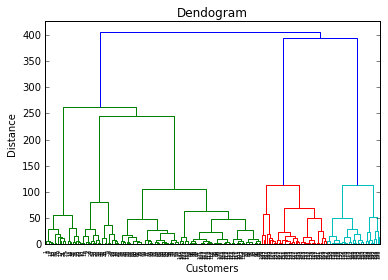

In [74]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

So $K=3$ or 5 can be reasonable choices. (We can try both, here we choose $K=5$).

**Agglomerative Hierarchical Clustering with $K=5$**.

In [28]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y = model.fit_predict(X)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int64)

**Visualization**

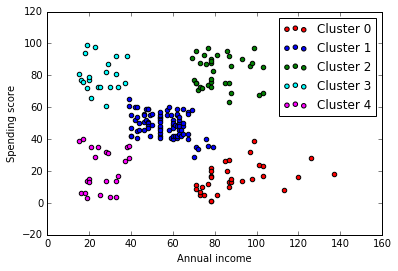

In [30]:
COLORS = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X.values[y == i, 0], X.values[y == i, 1], c = COLORS[i], label = 'Cluster %d' % i)
    #plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c = 'yellow')

plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()

# 5. Libraries in Python (cont'd)

## 5.1 scipy.sparse

It works faster than np.array for sparse matrices.

Example:

In [32]:
from scipy import sparse
from numpy import array
I = array([0,3,1,0])
J = array([0,3,1,2])
V = array([4,5,7,9])
A = sparse.coo_matrix((V,(I,J)),shape=(4,4))
A

<4x4 sparse matrix of type '<type 'numpy.int32'>'
	with 4 stored elements in COOrdinate format>

In [34]:
A.toarray()

array([[4, 0, 9, 0],
       [0, 7, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 5]])

In [35]:
A.dot(A)

<4x4 sparse matrix of type '<type 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [36]:
A.dot(A).toarray()

array([[16,  0, 36,  0],
       [ 0, 49,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0, 25]])

In [45]:
import numpy as np
A = np.zeros((2000, 2000))
A[0,0] = 4
A[3,3] = 5
A[1,1] = 7
A[0,2] = 9

import time
begin = time.time()
B = A.dot(A)
end = time.time()
print("Numpy array worked in %f seconds" % (end - begin))

Numpy array worked in 0.178000 seconds


In [46]:
import numpy as np
I = array([0,3,1,0])
J = array([0,3,1,2])
V = array([4,5,7,9])
A2 = sparse.coo_matrix((V,(I,J)),shape=(2000,2000))

import time
begin = time.time()
B2 = A2.dot(A2)
end = time.time()
print("Numpy array worked in %f seconds" % (end - begin))

Numpy array worked in 0.001000 seconds


## 5.2 Unicode

To check if a word in another language than English is capitalized/upper/lower, we need to decode it using some encoding method. The default encoding method used in Spyder is "utf-8". For example, the method **isupper** of **str** cannot recognize if a "strange" character is capitalized or not.

In [55]:
"Ư".isupper()

False

We need to decode the string to the basic unicode form. After decoding, the string become a **unicode** chain. If we re-encode the **unicode**, it becomes a **str** again.

In [70]:
a = "ư"
print(type(a))
b = "ư".decode("utf-8")
print(type(b))
c = b.encode("utf-8")
print(type(c))

<type 'str'>
<type 'unicode'>
<type 'str'>


By this way, we can check if a word is capitalized, eventually capitalize it

In [56]:
"Ư".decode("utf-8").isupper()

True

In [58]:
print("ư".upper())

ư


In [63]:
print("ư".decode("utf-8").upper().encode("utf-8"))

Ư


An equivalent way is putting **u** before the **str** to decode it.

In [78]:
type(u"Ư")

unicode

In [71]:
u"Ư".isupper()

True

In [72]:
u"ư".upper()

u'\u01af'

In [82]:
print(u"ư".upper())

Ư


# References

[1] Andrew Ng, *Machine Learning*, Course on <a href="http://coursera.org">coursera.org</a>

[2] Kirill Eremenko, *Machine Learning A-Z$^{TM}$: Hands-On Python & R in Data Science*, course on <a href="http://udemy.com">udemy.com</a>

[3] https://codefellows.github.io/sea-python-401d5/lectures/k_means.html

[4] Garey, M.; Johnson, D.; Witsenhausen, H. *The complexity of the generalized Lloyd - Max problem (Corresp.)*

[5] David Arthur; Sergei Vassilvitskii, *k-means++: The Advantages of Careful Seeding*

[6] https://www.superdatascience.com/machine-learning/

[7] Vincent Cohen-Addad, Varun Kanade, Frederik Mallmann-Trenn, and Claire Mathieu, *Hierarchical Clustering: Objective Functions and Algorithms*

[8] http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

